Moduli da installare tramite i seguenti comandi:
- *pip install missingno*
- *pip install plotly*

Moduli da installare tramite i seguenti comandi:
- *pip install missingno*
- *pip installer tracé*

Modules to be installed using the following commands:
- *pip install missingno*
- *pip install plotly*

# Analysis of suicides around the world

**INDEX**

- 1.1 DataFrame countries
- 1.2 DataFrame suicides *WHO*
- 1.3 Suicide dataset integration
- 1.4 Clustering on the trend of suicides over time by country
- 2.1 DataFrame Happiness score
- 2.2 Global unemployment data over time
- 2.3 2015 alcohol consumption data
- 3. Conclusions

**INTRODUCTION** <br>
The *World Health Organization (WHO)* estimates that around 800,000 people commit suicide every year worldwide, meaning one person dies every 40 seconds from this cause. The <a href='https://ourworldindata.org/grapher/annual-number-of-deaths-by-cause'> *Global Burden of Disease study* </a> shows that it is one of the most common causes of death in the world, and death by suicide occurs twice as much as death by homicide.
The objective of this analysis will focus on analyzing the variation of suicides in the world based on various parameters, such as time, sex, age group or region, for example being able to understand which countries have succeeded to lower their suicide rates and which countries have data on the rise. Subsequently, we will try to understand if there are any countries that have similar behaviors.<br>
Finally, socio-economic data will be integrated, such as *happiness score*, *unemployment* and *alcoholism*, which will allow us to try to find out if there is a correlation of suicides with them.

### 1.1 DataFrame countries</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

**Source: *Kaggle*** - link: https://www.kaggle.com/fernandol/countries-of-the-world

I will need this dataset to add information to the other datasets, it contains the information of the population, area, region and other data shown below a country.<br> In particular, in this dataset the region of origin is associated with each country , which will be used to aggregate data.

In [2]:
df_countries=pd.read_csv('countries of the world.csv')
df_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


##### Cleaning the dataset

I notice that in the column *Country* all the records have a trailing space. Using the *str.strip* method, the space is removed, thus allowing the subsequent merging of the datasets through the key *Country*.

In [3]:
# Eliminazione dello spazio nella colonna Country
df_countries['Country']=df_countries['Country'].str.strip()

As shown in the following cell, if I go to see the values ​​inside the *Region* column, I notice that there are a lot of unnecessary spaces, so I go to clean those values ​​using the *str.strip* method.

In [4]:
df_countries['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [5]:
# Utilizzo il metodo str.strip per modificare la colonna 'Region' eliminando gli spazi non necessari
df_countries['Region']=df_countries['Region'].str.strip()
df_countries['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

### 1.2 DataFrame suicides *WHO* </a>

**Source: *Kaggle*** - link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

This dataset was provided by the *WHO* and contains information on how suicides and suicides per 100,000 people in the population have varied by country, gender and age group over time.

In [6]:
# Lettura del dataset
df_suicide_who=pd.read_csv('suicide/suicide.csv')
# Struttura del dataset iniziale
df_suicide_who.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The suicide dataset provided by the *WHO* consists of *12 columns*:
- *country*: the country of reference
- *year*: the reference year
- *sex*: the reference sex
- *age*: the age range (*'15-24 years', '35 -54 years', '75 + years', '25 -34 years',' 55-74 years' , '5-14 years'*)
- *suicides_no*: absolute number of suicides for a given *year, country, sex and age group*
- *population*: total population for a given *year, country, sex and age group*
- *suicides / 100k pop*: number of suicides per 100,000 people (therefore it is a figure already normalized with respect to the population)
- *country-year*: string representing *'CountryYear* (e.g. *Albania1987* to indicate the records of the country *Albania* per year *1987*)
- *HDI for year*: Human Development Index
- *gdp_for_year*: Gross Domestic Product for a given state and for a given year
- *gdp_per_capita*: Gross Domestic Product normalized per person
- *generation*: string containing the generation referred to (e.g. '*Boomers*, *Generation X*, *Silent*)

##### Cleaning the dataset

Since the other datasets have columns with the first capital letter, to adapt this dataset to this standard, I change the names of the columns using the *capitalize* method.

In [7]:
# Rinominazione delle colonne, mettendole con lettera maiuscola attraverso metodo str.capitalize per uniformarle a altri dataset
df_suicide_who.columns=list(map(str.capitalize, df_suicide_who.columns))
df_suicide_who.head(2)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [8]:
# Lista dei paesi presenti nel dataset
df_suicide_who['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Using the *unique* method it can be seen that there are countries like *Russian Federation* and *Republic of Korea* which do not represent the standard country name (respectively *Russia* and *South Korea*). I then change the names of these countries using the *map* method.

In [9]:
# Modifiico il nome del paese 'Russian Federation'in 'Russia' e 'Republic of Korea'in 'Korea, South'
df_suicide_who['Country']=df_suicide_who['Country'].map({'Russian Federation':'Russia','Republic of Korea':'Korea, South'}).fillna(df_suicide_who['Country'])

The suicide dataset does not have information regarding the macro-region of a country. To overcome this fact, let's join this dataset to the *dataset of the* countries that we have previously imported using the key *Country*.

In [10]:
# Utilizziamo il metodo merge di Pandas, e scegliamo come tipo di join 'left'. E scegliamo come chiave 'Country'
df_suicide_who=pd.merge(left=df_suicide_who,right=df_countries[['Country','Region']],how='left',on='Country')
df_suicide_who.head(2)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation,Region
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,EASTERN EUROPE
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,EASTERN EUROPE


Let's now analyze the number of null values ​​in the dataset and the value type of each column in the dataset.

In [11]:
# Informazioni sul dataset e sui suoi valori non nulli
df_suicide_who.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             27820 non-null  object 
 1   Year                27820 non-null  int64  
 2   Sex                 27820 non-null  object 
 3   Age                 27820 non-null  object 
 4   Suicides_no         27820 non-null  int64  
 5   Population          27820 non-null  int64  
 6   Suicides/100k pop   27820 non-null  float64
 7   Country-year        27820 non-null  object 
 8   Hdi for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  Gdp_per_capita ($)  27820 non-null  int64  
 11  Generation          27820 non-null  object 
 12  Region              26404 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


<AxesSubplot:>

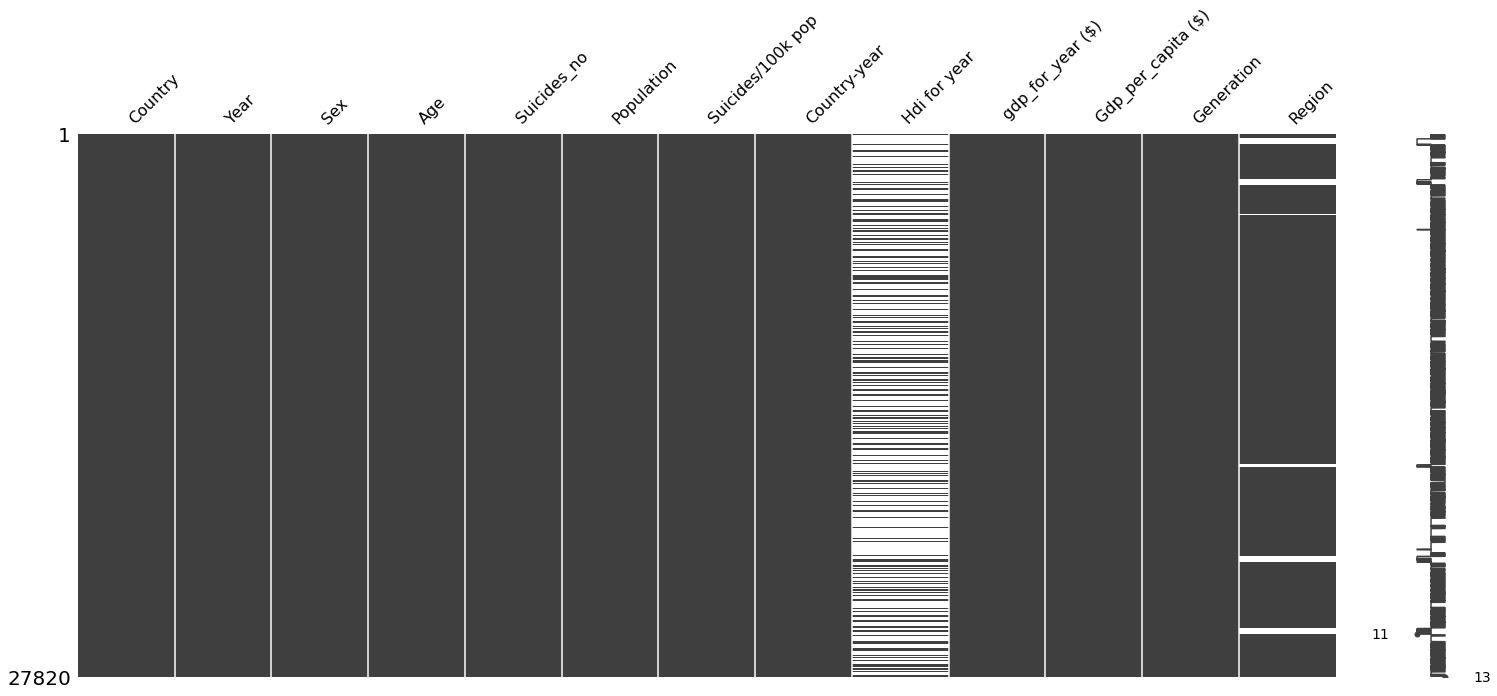

In [12]:
# Plot dei valori nulli del dataset
missingno.matrix(df_suicide_who)

Notice that there are a lot of null values ​​(about 70%) for the *Hdi for year* column. You then choose to delete that column.

In [13]:
# Elimino la colonna 'Hdi for year' dal dataset perché la maggioranza dei suoi valori sono nulli
df_suicide_who.drop(columns='Hdi for year',inplace=True)

Also it can be seen that the column *gdp_for_year* has two problems:
- the column name has a space before and after, so we use the *strip* method to change the name
- it is of the string type and not of the numeric type, as each record uses the comma as a separator. To overcome this problem we first use the *str.replace* method and then convert the data into numeric.

In [14]:
# Rinomino il nome della colonna togliendo gli spazi prima e dopo con il metodo strip
df_suicide_who.rename(columns={' gdp_for_year ($) ':' gdp_for_year ($) '.strip()},inplace=True)
# Elimino la virgola utilizzando il metodo str.replace
df_suicide_who['gdp_for_year ($)']=df_suicide_who['gdp_for_year ($)'].str.replace(',','')
# Converto la colonna in float
df_suicide_who['gdp_for_year ($)']=df_suicide_who['gdp_for_year ($)'].astype(float)

In [15]:
df_suicide_who.head()

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,gdp_for_year ($),Gdp_per_capita ($),Generation,Region
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X,EASTERN EUROPE
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent,EASTERN EUROPE
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X,EASTERN EUROPE
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation,EASTERN EUROPE
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers,EASTERN EUROPE


### Exploratory data analysis

As shown by the following cells, these data represent global suicide data from the year 1985 through 2016 inclusive and represent 101 distinct countries.

In [16]:
print(f"Dati suicidi dal {df_suicide_who['Year'].min()} al {df_suicide_who['Year'].max()}")
print(f"Dati suicidi di {df_suicide_who['Country'].nunique()} paesi distinti")

Dati suicidi dal 1985 al 2016
Dati suicidi di 101 paesi distinti


In [17]:
print(f"Paesi presenti:\n{df_suicide_who['Country'].unique()}")

Paesi presenti:
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Korea, South' 'Romania' 'Russia'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South A

For subsequent analyzes to assess the number of suicides in a country, the *Suicides / 100k pop* column is taken into account, which is a normalized measure that is not influenced by the population. For example, if we had used the *Suicides_no* column to measure suicides, the analysis would be heavily influenced by the population of a state.

#### Suicide analysis grouping by year

We want to analyze how the number of suicides in the world has changed over time. So let's aggregate the data through the *groupby* method of *Pandas* and then make a graph on the results obtained.

In [18]:
suicided_grouped_by_year=df_suicide_who.groupby('Year')

The next cell shows the size of each group relative to the year. We can see that before 1990 the groups are smaller in size, this is because for many countries, these data are not present. We can also note that for 2016 there are only 160 records in the group, probably because at the time this dataset was created, these data were not yet available. To make our analysis more homogeneous, since it was considered that the sample available was too small and could affect its correctness, the 2016 data will be eliminated.

In [19]:
suicided_grouped_by_year.size()

Year
1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
dtype: int64

In [20]:
# Eliminazione dei dati relativi al 2016, siccome solamente pochi stati hanno i dati aggiornati
df_suicide_who=df_suicide_who[df_suicide_who['Year']<2016]

#### Average annual global suicides

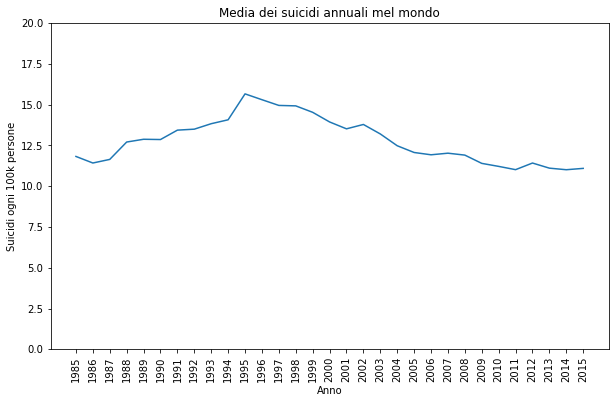

In [21]:
suicided_grouped_by_year=df_suicide_who.groupby('Year')
plt.figure(figsize=(10,6))
plt.title('Media dei suicidi annuali mel mondo')
plt.xlabel('Anno')
plt.ylabel('Suicidi ogni 100k persone')
plt.xticks(range(1985,2016),rotation=90)
plt.ylim(0,20)
plt.plot(suicided_grouped_by_year.agg(np.mean)['Suicides/100k pop'])

As can be seen from the graph above, it appears that since 1985 the number of suicides has increased, reaching a peak in 1995. However, after 1995, the number of global suicides has gradually decreased until 2010, and from 2010 to 2015 remained about constant at 11 suicides per 100,000 people.

#### Andamento dei suicidi globali differenziati per genere

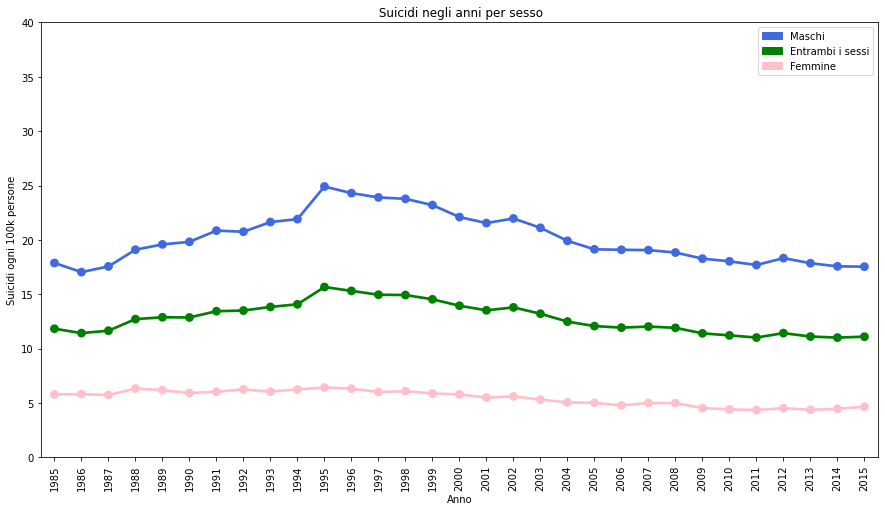

In [22]:
import matplotlib.patches as mpatches

# Dataframe ottenuto gruppando in base al sesso e all'anno e scegliendo come funzione di aggregazione la media
grouped_by_sex=df_suicide_who.groupby(['Year','Sex']).agg(np.mean).reset_index()
# Dataframe del sesso femminile
female_df=grouped_by_sex[grouped_by_sex['Sex']=='female']
# Dataframe del sesso maschile
male_df=grouped_by_sex[grouped_by_sex['Sex']=='male']

plt.figure(figsize=(15,8))
plt.title(' Suicidi negli anni per sesso')
sns.pointplot(x="Year", y="Suicides/100k pop",data=male_df,color='royalblue')
sns.pointplot(x="Year", y="Suicides/100k pop",data=suicided_grouped_by_year.agg(np.mean).reset_index(),color='green')
sns.pointplot(x="Year", y="Suicides/100k pop",data=female_df,color='pink')
plt.xticks(rotation=90)
plt.xlabel('Anno')
plt.ylabel('Suicidi ogni 100k persone')
plt.ylim(0,40)
red_patch = mpatches.Patch(color='royalblue', label='Maschi')
green_patch = mpatches.Patch(color='green', label='Entrambi i sessi')
blue_patch = mpatches.Patch(color='pink', label='Femmine')
plt.legend(handles=[red_patch,green_patch,blue_patch])

plt.show()

It is clear that there is a clear separation of the distributions of suicides by gender. The male gender commits far more suicides than the female gender. It can be said that the distribution of female suicides has remained almost constant over time at about 5 suicides per 100,000 people, while that of men peaked in 1995, and then gradually decreased, reaching about 18 suicides per 100,000 people in 2015. .

#### Andamento suicidi differenziati per zona

Text(0.5, 1.0, 'Numero di suicidi nel mondo dal 1985 al 2016')

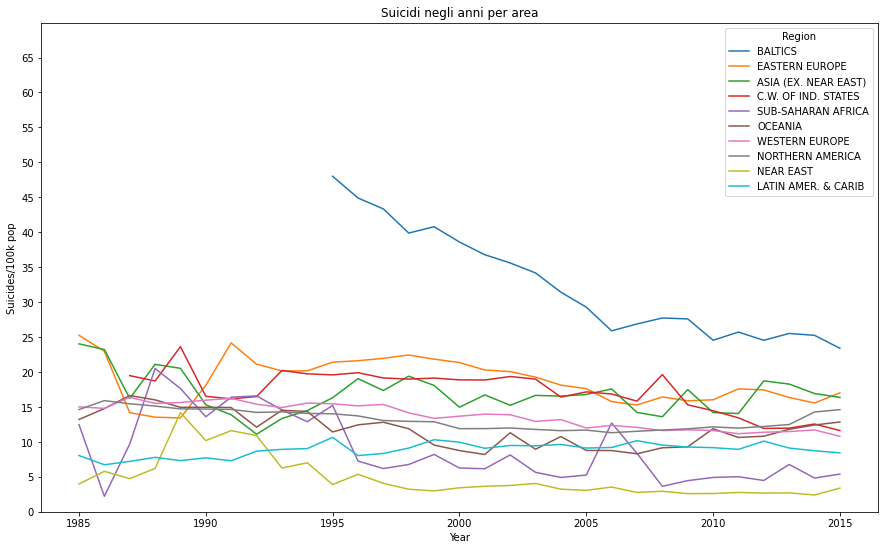

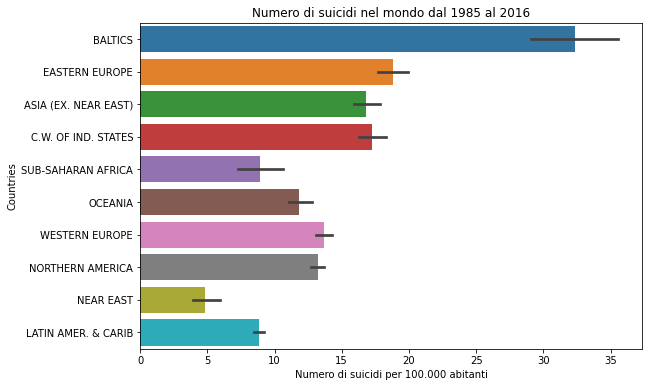

In [23]:
# Dataframe ottenuto gruppando in base alla regione e all'anno e scegliendo come funzione di aggregazione la media.
# In questo modo riusciamo a vedere il diverso andamento dei suicidi negli anni per regione
grouped_by_region=df_suicide_who.groupby(['Region','Year']).agg(np.mean).reset_index().sort_values(by='Suicides/100k pop',ascending=False)

# Primo grafico: lineplot in base alla regione
plt.figure(figsize=(15,9))
plt.ylim(0,70)
plt.yticks(range(0,70,5))
sns.lineplot(data=grouped_by_region, x="Year", y="Suicides/100k pop", hue="Region")
plt.title('Suicidi negli anni per area')

# Secondo grafico: barplot in base alla regione
ax=plt.figure(figsize=(9,6))
ax = sns.barplot(x=grouped_by_region["Suicides/100k pop"],                 
                 y=grouped_by_region["Region"])
ax.set(xlabel='Numero di suicidi per 100.000 abitanti', ylabel='Countries')
ax.set_title('Numero di suicidi nel mondo dal 1985 al 2016')


In [24]:
# Paesi che fanno parte della zona con meno suicidi ovvero 'NEAR EAST'
df_suicide_who[df_suicide_who['Region']=='NEAR EAST']['Country'].unique()

array(['Bahrain', 'Cyprus', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Turkey',
       'United Arab Emirates'], dtype=object)

The graph above represents the trend of suicides over the years by area. It can be seen that the *BALTICS* zone starts from 1995 and not from 1985, this is because these data are not present in the dataset (as also shown by the following cell). <br>
In general it can be seen that the area *BALTICS* has many more suicides than the other areas, in fact the line that represents it is well separated from the others, however it is noted that for this area, suicides have decreased a lot in the time compared to 1995.<br>
For the other areas it can be said that the *NEAR EAST* area (made up of states such as *Israel*, *Turkey* and *Quatar*) has much less suicides compared to other areas, which instead have more or less a similar number of suicides per 100,000 people.

In [25]:
print(f"Anni presenti nel dataset per la regione 'BALTICS':\n{df_suicide_who[df_suicide_who['Region']=='BALTICS']['Year'].unique()}")

Anni presenti nel dataset per la regione 'BALTICS':
[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015]


#### Distribuzione suicidi per età e sesso

<AxesSubplot:title={'center':'Boxplot dei suicidi differenziati per età e sesso'}, xlabel='Age', ylabel='Suicides/100k pop'>

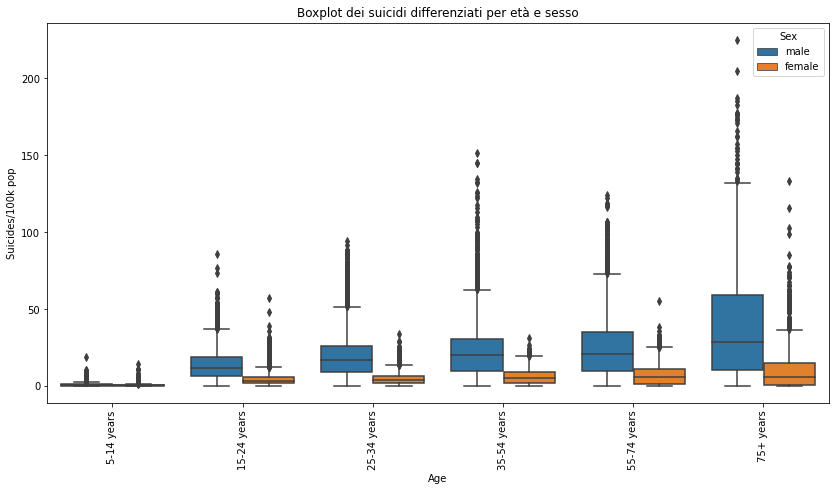

In [26]:
# Ordinamento che andrò ad assegnare per maggior chiarezza visiva
order_age=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
plt.figure(figsize=(14,7))
plt.title('Boxplot dei suicidi differenziati per età e sesso')
plt.xticks(rotation=90)
sns.boxplot(x="Age", y="Suicides/100k pop",hue="Sex",data=df_suicide_who,order=order_age)

As seen from the *boxplot* above, suicides generally increase with increasing age. Furthermore, it can be clearly seen that, apart from the data ranging from *5 to 14*, there are more male suicides than female suicides for all age groups.

Text(0.5, 1.0, 'Suicidi negli anni per età')

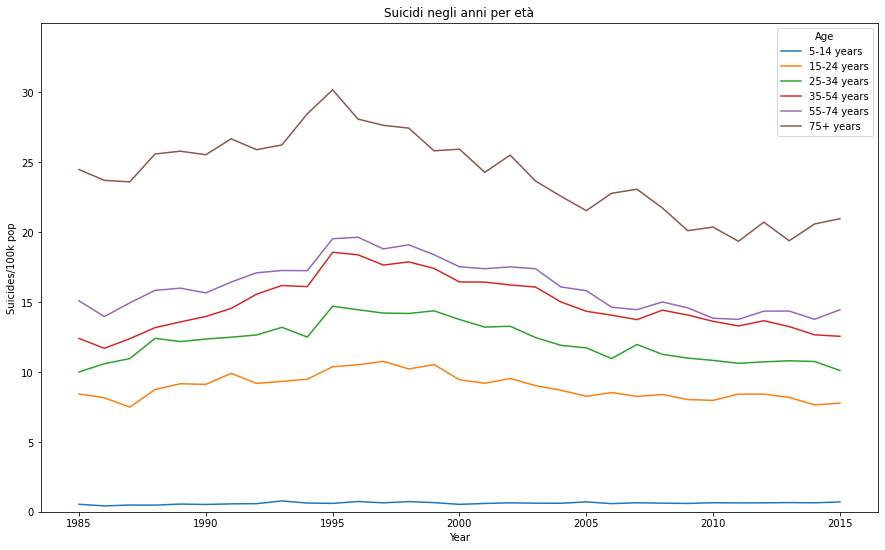

In [27]:
# Dataframe ottenuto gruppando per fascia d'età e anno per riuscire a vedere l'andamento dei suicid negli anni per fascia d'età
grouped_by_age=df_suicide_who.groupby(['Age','Year']).agg(np.mean).reset_index().sort_values(by='Age')

plt.figure(figsize=(15,9))
sns.lineplot(data=grouped_by_age, x="Year", y="Suicides/100k pop", hue="Age",hue_order=order_age)
plt.ylim(0,35)
plt.yticks(range(0,35,5))
plt.title('Suicidi negli anni per età')

For all ages apart from *5-14 years* a peak can be seen around the 1995 years. Furthermore, for the age group *75+ years*, suicides have decreased since 1985 slightly.

##### Paesi mancanti nel dataset suicidi *WHO*

In [28]:
# Insieme dei paesi presenti nel dataset dei suicidi fornito dal WHO (df_suicide_who)
countries_dataset_suicide=set(df_suicide_who['Country'].unique())
# Insieme dei paesi presenti nel dataset dei paesi preso da Kaggle (df_countries)
countries_total=set(df_countries['Country'].unique())

print(f"Numero di paesi mancanti nel dataset dei suicidi WHO:\n {len(countries_total.difference(countries_dataset_suicide))}")
print(f"\nLista paesi mancanti nel dataset dei suicidi WHO:\n {countries_total.difference(countries_dataset_suicide)}")

Numero di paesi mancanti nel dataset dei suicidi WHO:
 135

Lista paesi mancanti nel dataset dei suicidi WHO:
 {'St Pierre & Miquelon', 'Bangladesh', 'Faroe Islands', 'French Polynesia', 'Iran', 'Tanzania', 'Bhutan', 'Libya', 'Bahamas, The', 'Mongolia', 'Hong Kong', 'Cayman Islands', 'Saint Vincent and the Grenadines', 'Afghanistan', 'Cape Verde', 'Reunion', 'Tonga', 'Senegal', 'Haiti', 'British Virgin Is.', 'Cambodia', 'East Timor', 'Vanuatu', 'Tuvalu', 'Nigeria', 'Turks & Caicos Is', 'Ghana', 'Honduras', 'Jordan', 'Gambia, The', 'Somalia', 'Macedonia', 'Syria', 'Anguilla', 'Laos', 'Bosnia & Herzegovina', 'Brunei', 'Congo, Dem. Rep.', 'Cameroon', 'Taiwan', 'Egypt', 'New Caledonia', 'Nauru', 'Bolivia', 'Andorra', 'Cook Islands', 'Nepal', 'Malawi', 'Trinidad & Tobago', 'Comoros', 'Pakistan', 'Equatorial Guinea', 'Congo, Repub. of the', 'Madagascar', 'Monaco', 'Swaziland', 'Burundi', 'French Guiana', 'Bermuda', 'Isle of Man', 'Malaysia', 'Kenya', 'Guinea', 'Martinique', 'Botswana', 'Kore

As can be seen, data from 135 countries are missing from the suicide dataset provided by the *World Health Organization*, including important countries such as *China*, *India* , *Greenland* (*Greenland*) and many others. To make the analysis more complete, the dataset was integrated through an additional source.

### 1.3 Integration of suicide dataset </a>

As mentioned earlier, many countries are missing from the dataset provided by the *WHO*. Let's integrate the data with another dataset provided in the following link https://ourworldindata.org/grapher/suicide-death-rates?time=2017. <br> However, in this dataset there is no suicide rate based on sex and age of the person, but only the number of suicides per 100,000 people for a given country and a given year.
To be able to integrate these data into the WHO suicide dataset we will do this:
- loading and data processing of the new suicide dataset
- aggregation of data on the WHO suicide dataset to render it with a homogeneous structure to the other dataset
- vertical concatenation of datasets with relative duplicate removal treatment <br>

The data will then be combined, in order to be able to make a more complete analysis of the countries.

In [29]:
# Lettura del secondo datatset dei suicidi
df_suicide2=pd.read_csv('suicide/suicide-death-rates.csv')
# Elimino la colonna 'Code'
df_suicide2=df_suicide2.drop(columns='Code')
# Rinomino le colonne
df_suicide2.rename(columns={'Entity':'Country','Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)':'Suicides/100k pop'},inplace=True)
# Come nel dataset dei suicidi WHO, combino i dati con df_countries per associare una 'Region' a ciascuno paese
df_suicide2=pd.merge(df_suicide2,df_countries.loc[:,['Country','Region']],on='Country')
df_suicide2.head()

,Country,Year,Suicides/100k pop,Region
0,Afghanistan,1990,10.318504,ASIA (EX. NEAR EAST)
1,Afghanistan,1991,10.327010,ASIA (EX. NEAR EAST)
2,Afghanistan,1992,10.271411,ASIA (EX. NEAR EAST)
3,Afghanistan,1993,10.376123,ASIA (EX. NEAR EAST)
4,Afghanistan,1994,10.575915,ASIA (EX. NEAR EAST)


In [30]:
# Preparo il dataset dei suicidi del WHO in modo poi da combinarlo con l'altro dataset.
# Gruppo quindi per ['Year','Region','Country'] aggregando quindi i dati che si differenziavano per età e sesso e facendo la
# media tra di essi.
who_suicide_grouped=df_suicide_who.groupby(['Year','Region','Country']).agg(np.mean).reset_index()[['Year','Country','Suicides/100k pop','Region']]

# Concateno verticalmente i due dataset dei suicidi aventi già la stessa struttura
df_suicide_complete=pd.concat([who_suicide_grouped,df_suicide2])

# Stampo il numero di record duplicati
print(f"Numero di record duplicati per [anno,paese]: {len(df_suicide_complete[df_suicide_complete.duplicated(['Country','Year'])])}")

# Elimino i duplicati per lo stesso paese e lo stesso anno, tenendo la prima occorenza (quindi i dati WHO)
df_suicide_complete=df_suicide_complete.drop_duplicates(subset=['Year','Country'],keep='first')
df_suicide_complete.head()

Numero di record duplicati per [anno,paese]: 1881


,Year,Country,Suicides/100k pop,Region
0,1985,Japan,25.039167,ASIA (EX. NEAR EAST)
1,1985,"Korea, South",12.220833,ASIA (EX. NEAR EAST)
2,1985,Singapore,29.446667,ASIA (EX. NEAR EAST)
3,1985,Sri Lanka,46.560000,ASIA (EX. NEAR EAST)
4,1985,Thailand,6.878333,ASIA (EX. NEAR EAST)


Let's now compare the size and number of countries present in the dataset obtained, that is the one integrated with data from other countries, with the suicide dataset provided by the *WHO*.

In [31]:
print(f"Dimensione del dataset attuale: {df_suicide_complete.shape}")
print(f"Range anni presenti nel dataset attuale: {df_suicide_complete['Year'].min()} - {df_suicide_complete['Year'].max()}")
print(f"Numero di paesi del dataset attuale: {df_suicide_complete['Country'].nunique()}")
print(f"Numero di paesi del dataset WHO: {df_suicide_who['Country'].nunique()}")

Dimensione del dataset attuale: (5150, 4)
Range anni presenti nel dataset attuale: 1985 - 2017
Numero di paesi del dataset attuale: 178
Numero di paesi del dataset WHO: 100


As you can see, using another source we were able to obtain data from 78 countries that were not previously present in the *WHO* dataset.

#### Suicidi per paese

[Text(0.5, 0, 'Numero di suicidi per 100.000 abitanti'),
 Text(0, 0.5, 'Countries')]

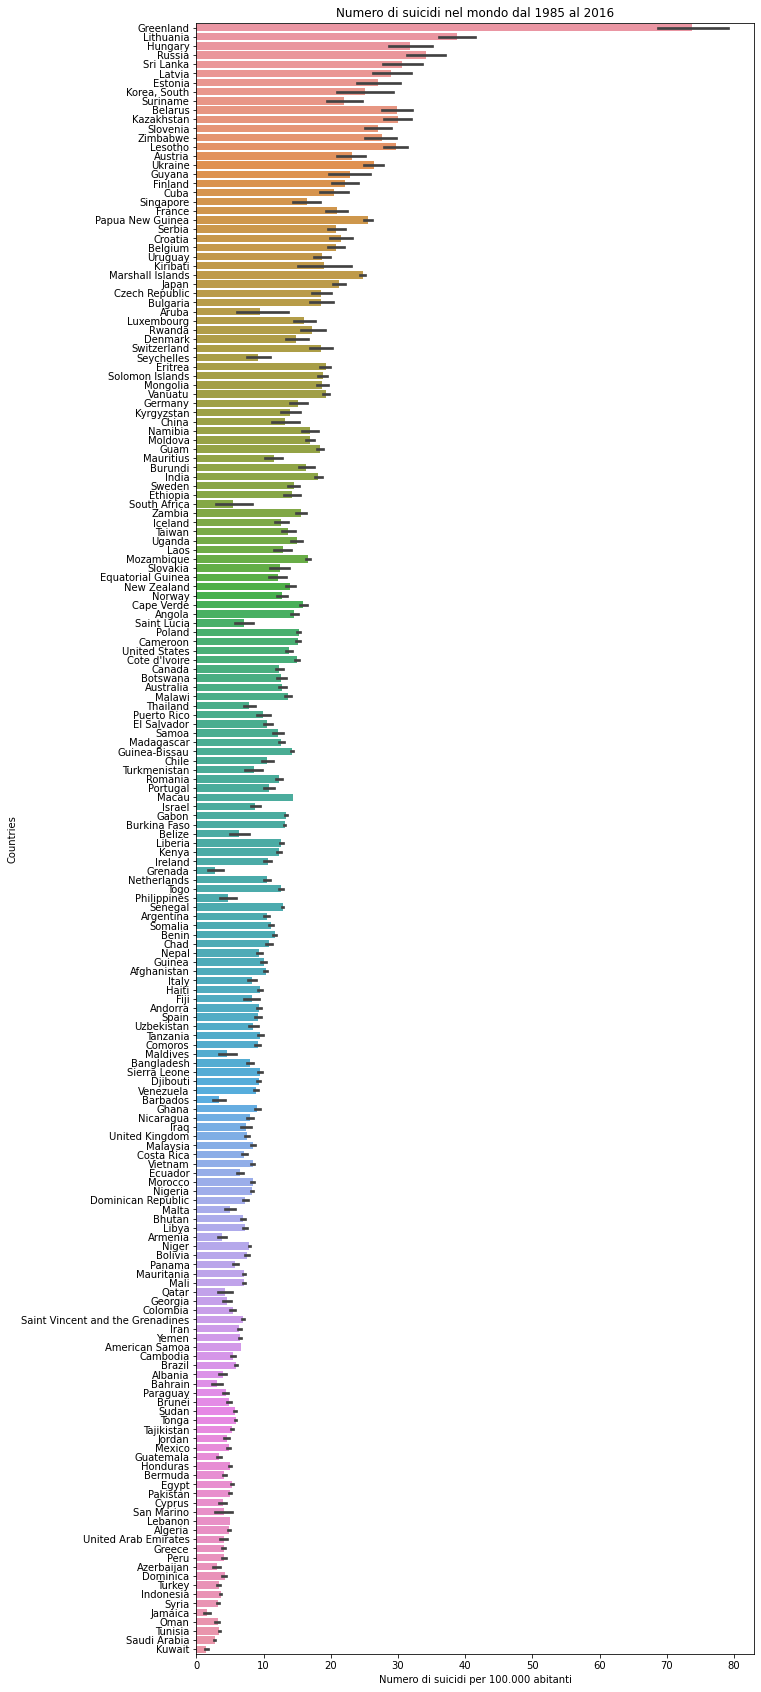

In [32]:
ax=plt.figure(figsize=(10,30))
ax = sns.barplot(data=df_suicide_complete.sort_values(by='Suicides/100k pop',ascending=False),
                 x="Suicides/100k pop",                 
                 y="Country")
ax.set_title('Numero di suicidi nel mondo dal 1985 al 2016')
ax.set(xlabel='Numero di suicidi per 100.000 abitanti', ylabel='Countries')

It is very clear that the country with the most suicides is *Greenland*, followed in the distance by *Lithuania*, *Hungheria* and *Russia*. The countries with the least suicides are *Kuwait*, *Saudi Arabia*, *Tunisia* and *Jamaica*.

#### Geographical map of suicides

Using the interactive plot of *plotly*, which allows us to associate the states on the map by their name (by setting *locationmode = "country names"*), we can discover patterns based on country position on the map.

In [33]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot

def show_geographical_map(df,title):
    # Utilizzo la choropleth map di plotly - link: https://plotly.com/python/choropleth-maps/
    data = dict(
            type = 'choropleth',
            colorscale = 'Reds',
            locations = df['Country'],
            locationmode = "country names",
            z = df['Suicides/100k pop'],
            text = df['Country'],
            colorbar = {'title' : 'Suicides/100k pop'},
          )
    layout = dict(title = title,
                  geo = dict(projection = {'type':'mercator'})
                 )
    choromap = go.Figure(data = [data],layout = layout)
    iplot(choromap,validate=False)

##### Mappa dei suicidi (media nel tempo)

In [34]:
grouped_suicide_by_country=df_suicide_complete.groupby('Country').agg(np.mean).reset_index()
choromap=show_geographical_map(grouped_suicide_by_country,
                     title='Media nel tempo dei suicidi nel mondo')

NameError: name 'go' is not defined

First of all it can be clearly seen that there is an anomalous state that has many more suicides than the rest of the world, which is *Greenland*. It is also seen that the countries of *Eastern Europe* and *North Asia* have a higher suicide rate than the rest of the world. In the Americas the suicide rate is quite low, as well as in Africa (except for some anomalous states such as *Zimbabwe*).

##### 2015 Suicide Map

In [ ]:
# Dataset dei suicidi del 2015
df_suicide_2015=df_suicide_complete[df_suicide_complete['Year']==2015]
show_geographical_map(df_suicide_2015,
                     title='Suicidi nel mondo nel 2015')

Analyzing the situation in 2015, we can see that for some states such as *Guyana*, *Lesotho* and *South Korea* have worsened, while other states such as *Russia* and *Lithuania* and other eastern countries bordering *Russia* have a lower number of suicides than the previous graph showing the average suicides.

### 1.4 Clustering on the trend of suicides over time by country </a>

We now want to analyze the change in the number of suicides for each country and see if we can discover patterns based on the variation in suicides over the years. To do this, first of all we will modify the dataset, so as to have the country for each row and the year for each column. <br>
To do all this we use the *Pandas pivot* method. We will then use a clustering algorithm (in this case *Kmeans*) to assign to each country a label produced by the algorithm that identifies the cluster to which it belongs. <br>
Finally we will then apply a *dimensionality reduction* technique to allow you to view the data through an interactive scatter plot.

In [ ]:
# Applico il metodo pivot per rimodellare il dataset e prepararmi i dati da passare a KMeans. Tengo le colonne dal 1990 al 2015 comprese
df_suicide_pivot=(df_suicide_complete.pivot('Country','Year','Suicides/100k pop')).iloc[:,5:-2]
# Elimino le righe contenenti valori nulli nel dataset, in quanto Kmeans non funziona con valori nulli
df_suicide_pivot=df_suicide_pivot.dropna()
# Mostro la struttura del dataset . Ogni cella rappresenta il numero di suicidi ogni 100k persone per un dato paese e anno
df_suicide_pivot.head()

I apply *KMeans* using 6 clusters.

In [ ]:
from sklearn.cluster import KMeans

# Prendo soloamente i valori del dataset
X=df_suicide_pivot.values
# Applico l'algoritmo kmeans di sklearn sui miei dati, assegnando il numero di cluster=6
kmeans = KMeans(n_clusters=6, random_state=42).fit(X)

I use a dimensionality reduction technique called *PCA* which allows me to switch to only 2 components, and then allows a graphical display of the data. In this case I can have using the first two main components I can have an explained variance of about 97%.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Applico PCA di sklearn settando il numero di componenti a 2
pca=PCA(n_components=2)
scores=pca.fit_transform(X)
print(f"Varianza spiegata dalle prime due componenti principali: {sum(pca.explained_variance_ratio_)*100}%")

In [ ]:
import plotly.express as px
# Visualizzazione interattiva del grafico tramite plotly colorando i punti in base al cluster assegnato da KMeans
px.scatter(x=scores[:,0],y=scores[:,1], color=kmeans.labels_.astype(str),text=df_suicide_pivot.index,labels={
                     "x": "First component PCA",
                     "y": "Second component PCA",
                     "color": "Clusters by KMeans"
                 },)

In [ ]:
# Visualizzazione dello lineplot per interpretare meglio l'andamento generale dei cluster
# Come detto prima tengo solamente i dati tra il 1990 e 2015 compresi
df_suicide_1990_2015=df_suicide_complete[df_suicide_complete['Year'].between(1990, 2016)]

# Creazione di un dizionario per associare i cluster ai paesi
clusters_countries=dict(zip(df_suicide_pivot.index.tolist(),kmeans.labels_))
# Creo la colonna cluster per associare a ogni paese il cluster assegnato da Kmeans
df_suicide_1990_2015['Cluster']=df_suicide_1990_2015['Country'].map(clusters_countries)
# Elimino i valori nulli
df_suicide_1990_2015=df_suicide_1990_2015.dropna()
# Converto i valori dei cluster in valori interi per una migliore chiarezza visiva
df_suicide_1990_2015['Cluster']=df_suicide_1990_2015['Cluster'].astype(int)

# Lineplot
plt.figure(figsize=(12,8))
plt.yticks(range(0,100,5))
sns.lineplot(data=df_suicide_1990_2015,x='Year',y='Suicides/100k pop',hue='Cluster',palette="bright")
plt.title('Andamento dei suicidi negli anni per cluster')

From the two graphs shown above we can say this:
- the countries of the *cluster 1, cluster 2 and cluster 4* have a similar variation over time, i.e. they remain approximately constant, mainly differing in the fact that the *cluster 1* has a very low suicides, the *cluster 4* has a low average suicide rate, while the *cluster 2* has an average suicide rate, ie about 20 suicides per 100,000 people.
- the countries in *cluster 5*, as seen in the scatter plot, all appear to be countries of *Eastern Europe* / *Asia*, and are characterized by a trend in suicides very high until about the 2000s, while subsequently suicides seem to decrease.
- on the contrary, the countries of the *cluster 0* seem to have the opposite trend: initially the number of suicides was quite low, but over time (since 1995) it has increased.
- cluster 3 is formed only by *Greenland*, (*Greenland*). This country is very different from the others, in fact here the number of suicides is much higher than in other states.

#### Specific analysis on *South Korea*

As it appears that in some countries the number of suicides has increased over time, let's analyze for example how the distribution of suicides in *South Korea* has varied over time based on gender and age group. To do this you need to use the suicide dataset of the *WHO*, because only in this dataset we have the data divided according to these parameters.

C:\Users\pietr\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
C:\Users\pietr\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


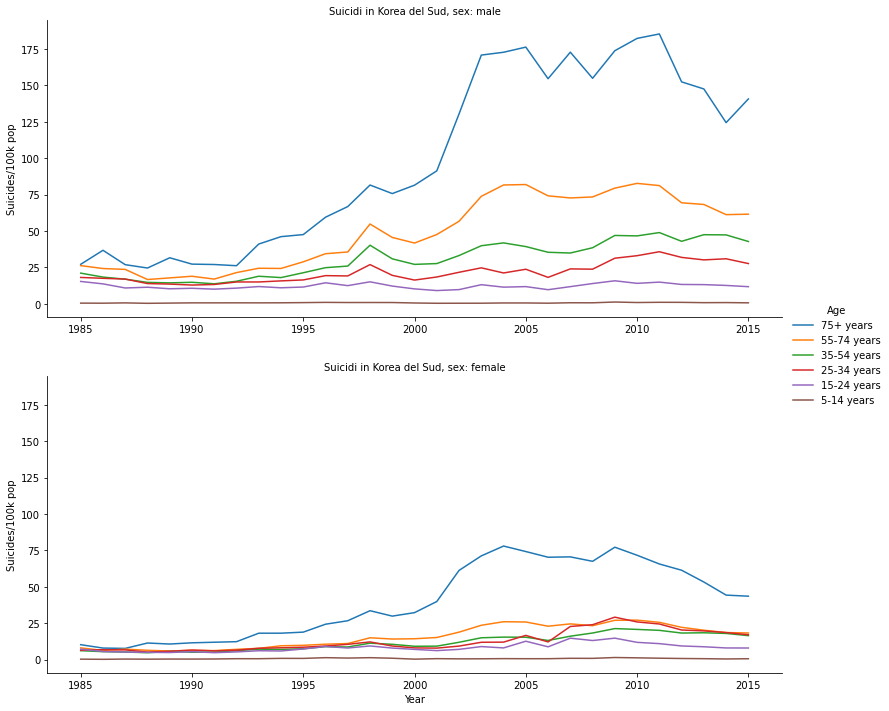

In [35]:
g = sns.FacetGrid(df_suicide_who[(df_suicide_who['Country']=='Korea, South')], row="Sex",hue="Age",height=6,aspect=2,
                 gridspec_kws={"hspace":0.2})
g.map(sns.lineplot, "Year","Suicides/100k pop")
g.set_titles(row_template='Suicidi in Korea del Sud, sex: {row_name}')
g.add_legend()
g.axes[0,0].tick_params(labelbottom=True)

It can be seen that for both sexes there has been a large increase in suicides for the *75+ years* age group starting around the 2000s. According to wikipedia (https://en.wikipedia.org/ wiki / Suicide _in_ South_Korea), the main reason can be traced back to an economic crisis (undefined Asian financial crisis</a>) which has led the older population to be poorer. Because of this and a lack of family support, many seniors have made this extreme decision. The presence of a crisis can be seen by comparing the *GDP per capita* of *South Korea* over the years, as shown in the graph below; here it is noted that in 1997 there was a decrease of it.
Furthermore, it can be noted that since 2010 the data relating to suicides of the older population has been decreasing for both sexes, this means that the policies implemented by the government to combat this social scourge are working.

<AxesSubplot:title={'center':'GDP per Capita in Sud Korea nel tempo'}, xlabel='Year', ylabel='Gdp_per_capita ($)'>

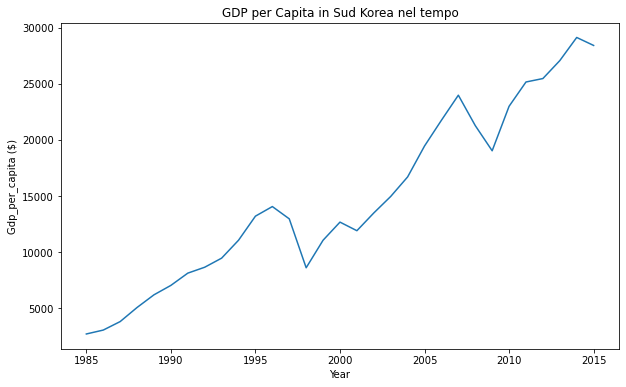

In [36]:
plt.figure(figsize=(10,6))
plt.title('GDP per Capita in Sud Korea nel tempo')
sns.lineplot(data=df_suicide_who.loc[(df_suicide_who['Country']=='Korea, South')].groupby(['Country','Year']).agg(np.mean).reset_index(),x='Year',y='Gdp_per_capita ($)')

## Suicides and correlations between data

### 2.1 DataFrame Happiness score</a>

**Source: *Kaggle*** - link: https://www.kaggle.com/unsdsn/world-happiness

For about eight years now, a survey has been conducted that examines the results from 156 countries around the world, with the aim of building a macro-indicator (*happiness score*) capable of measure the happiness of a country. To do this, variables such as the country's wealth, the generosity of the inhabitants, life expectancy and the perception of corruption towards the government are taken into account in the survey.
Since only the 2015 to 2019 happiness score data are provided, and since the suicide data range from 1985 to 2015, we will only use the 2015 happiness score dataset, as it is the only year that can be cross-referenced with the suicide data. .

##### Data processing

In [37]:
# Caricamento del dataset
df_happiness_2015=pd.read_csv('happiness_2015.csv')
# Creo un nuova colonna 'Year' a cui assegno il 2015, mi serve per incrociare i dati sucessivamente
df_happiness_2015['Year']=2015
# Formato del dataset
df_happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [38]:
# Visualizzazione tipi di dato delle colonne e dei valori nulli
df_happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

##### Exploratory analysis

<AxesSubplot:title={'center':'Happiness score in base alla regione'}, xlabel='Region', ylabel='Happiness Score'>

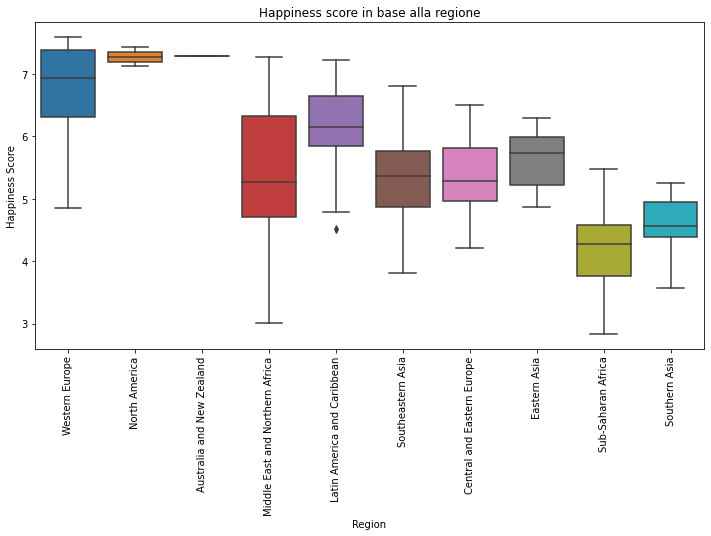

In [39]:
plt.figure(figsize=(12,6))
plt.title('Happiness score in base alla regione')
plt.xticks(rotation=90)
sns.boxplot(x="Region", y="Happiness Score",data=df_happiness_2015)

It can be seen that the areas with the highest average happiness are *Western Europe*, *North America* and *Australia and New Zealand*. It can be seen that the *Middle East and Northern Africa* area has a great variability. Furthermore, it can be seen that the *Sub-Saharan Africa* and *Southern Asia* areas are generally the areas in which there is generally a lower happiness score than other areas. <br>
It can also be noted that the *Latin America and Caribbean* zone has an outlier that is less than the distribution for that region. Let's figure out what this state is through the *inter-quartile range (IRQ)*.

In [40]:
# Dataframe contenente solamente i dati sull'happiness score della regione 'Latin America and Caribbean'
latin_america_df=df_happiness_2015.loc[df_happiness_2015['Region']=='Latin America and Caribbean',['Country','Happiness Score']]
latin_america_df=latin_america_df.sort_values(by='Happiness Score')

q1, q3= np.percentile(latin_america_df['Happiness Score'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
latin_america_df[latin_america_df['Happiness Score']<lower_bound]

,Country,Happiness Score
118,Haiti,4.518


#### Relazione tra *happiness score* e *PIL pro capite*

<AxesSubplot:title={'center':'Relazione tra Happiness Score e GDP per Capita'}, xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

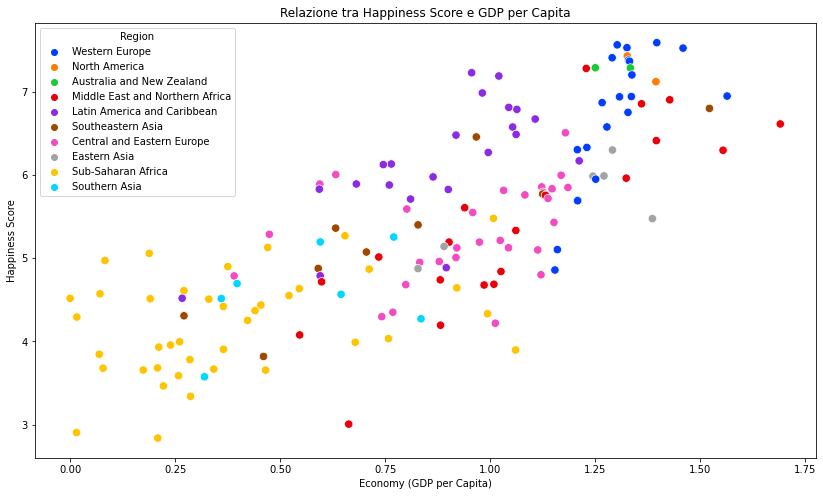

In [41]:
plt.figure(figsize=(14,8))
plt.title('Relazione tra Happiness Score e GDP per Capita')
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",hue='Region', data=df_happiness_2015,palette='bright',s=70)

It can be clearly seen that the states belonging to *Sub-Saharan Africa*, which we had previously seen had a lower happiness score than others, have all been very poor, ranking in the lower corner. left in the graph. *Haiti*, the outlier for the area *Latin America and Caribbean* seen before, you can see how much poorer it is than the states in its area, this could be an important factor that characterizes his happiness score so low. <br>
The areas with the highest happiness score seen before, that is *Western Europe*, *North America* and *Australia and New Zealand*, are all very rich areas, in fact they all rank top right.

In [42]:
df_happiness_2015[['Economy (GDP per Capita)','Happiness Score']].corr()

,Economy (GDP per Capita),Happiness Score
Economy (GDP per Capita),1.000000,0.780966
Happiness Score,0.780966,1.000000


As we can see from the *scatter plot* shown above, we can understand how there is a close correlation between the *happiness score* and the wealth of a country, measured as *GDP per capita <*> of it. More precisely, we can see that the graph follows a linear trend, and if we measure this linear correlation through the*Pearson coefficient*, a correlation of 0.78 is obtained, which is very high. <br>
This, considering the nature of the data*happiness score*is quite obvious, given that, as we said earlier, the*happiness score*is calculated using various parameters including the*GDP per Capita <*>.

##### Fusion and correlations with suicides

We now move on to combine the data in order to have for each record the country and the data concerning both the suicides that occurred in 2015 and the data concerning the *happiness score*.

In [43]:
# Salvo in df_suicide_2015 i suicidi avvenuti nel 2015
df_suicide_2015=df_suicide_complete[df_suicide_complete['Year']==2015]

# Utilizzo merge per combinare i dati utilizzando come chiave ['Country' e 'Year'] (metodo inner join)
# Elimino la colonna 'Region' nella fusione siccome sarebbe un dato ridondante perché è gia presente nel dataset dei suicidi
df_suicide_happiness_2015=pd.merge(df_suicide_2015,df_happiness_2015.drop(columns='Region'),on=['Country','Year'])
df_suicide_happiness_2015.head(3)

,Year,Country,Suicides/100k pop,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Japan,17.1700,ASIA (EX. NEAR EAST),46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
1,2015,Singapore,9.1075,ASIA (EX. NEAR EAST),24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
2,2015,Thailand,6.7625,ASIA (EX. NEAR EAST),34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945


In [44]:
print(f"Numero di stati nel dataset combinato: {df_suicide_happiness_2015['Country'].nunique()}\n\
Lista stati:\n{df_suicide_happiness_2015['Country'].unique()}")

Numero di stati nel dataset combinato: 142
Lista stati:
['Japan' 'Singapore' 'Thailand' 'Estonia' 'Latvia' 'Lithuania' 'Armenia'
 'Georgia' 'Kazakhstan' 'Kyrgyzstan' 'Russia' 'Turkmenistan' 'Ukraine'
 'Croatia' 'Czech Republic' 'Hungary' 'Poland' 'Romania' 'Serbia'
 'Slovenia' 'Argentina' 'Brazil' 'Chile' 'Colombia' 'Ecuador' 'Guatemala'
 'Mexico' 'Nicaragua' 'Panama' 'Uruguay' 'Cyprus' 'Israel' 'Qatar'
 'Turkey' 'United States' 'Australia' 'Mauritius' 'South Africa' 'Austria'
 'Belgium' 'Denmark' 'Finland' 'Germany' 'Greece' 'Iceland' 'Italy'
 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom' 'Afghanistan' 'Albania' 'Algeria' 'Angola'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Benin' 'Bhutan' 'Bolivia'
 'Botswana' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Chad' 'China' 'Comoros' 'Costa Rica' 'Djibouti'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Ethiopia' 'France' 'Gabon'
 'Ghana' 'Guinea' 'Haiti' 'Honduras' '

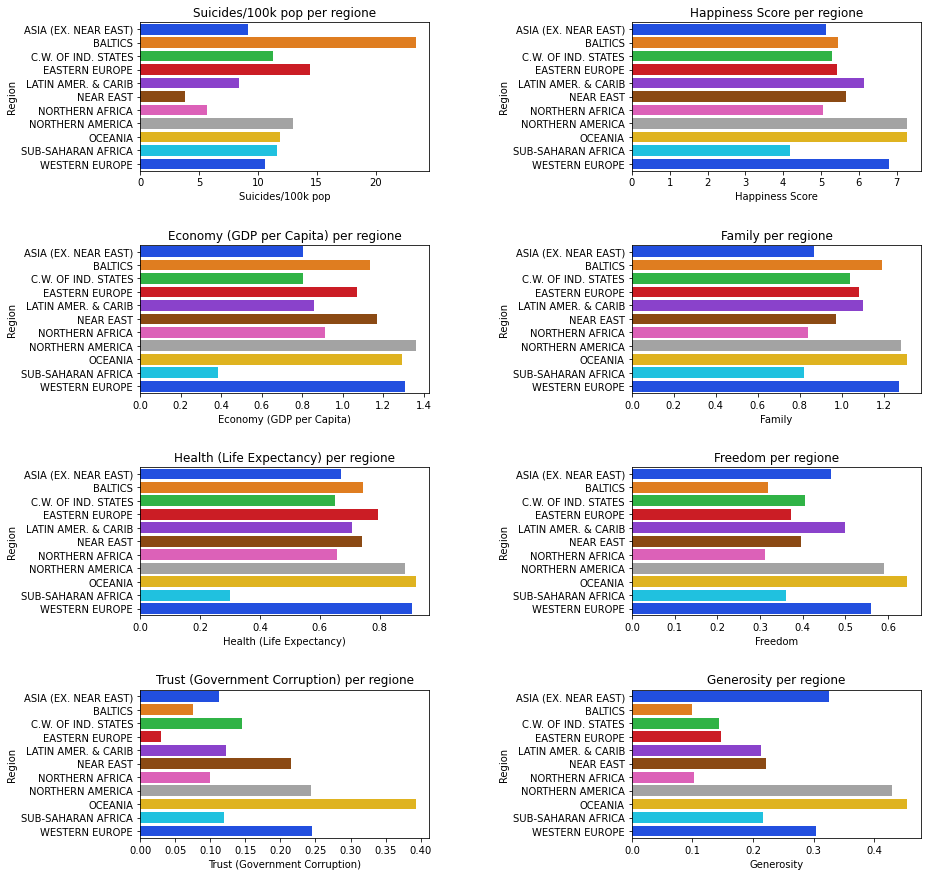

In [45]:
fig, axs = plt.subplots(4, 2,figsize=(14,15))
plt.subplots_adjust(wspace = 0.7, hspace = 0.5) 
# Colonne da considerare e di cui fare il grafico
columns_to_plot=['Suicides/100k pop','Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
'Freedom', 'Trust (Government Corruption)', 'Generosity',]
grouped_by_region=df_suicide_happiness_2015.groupby('Region').agg(np.mean).reset_index()
i=0
j=0
for c in grouped_by_region.loc[:,columns_to_plot]:
    sns.barplot(x=grouped_by_region[c],y=grouped_by_region["Region"],ax=axs[i,j],palette='bright').set_title(f'{c} per regione')
    if j==1:
        j=0
        i+=1
    else:
        j+=1

#### Correlation between Happiness score and number of suicides

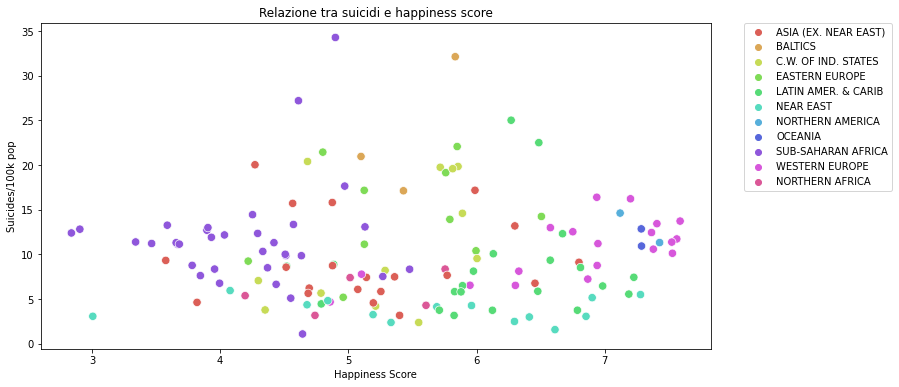

In [46]:
plt.figure(figsize=(12,6))
plt.title('Relazione tra suicidi e happiness score')
sns.scatterplot(data=df_suicide_happiness_2015,x='Happiness Score',y='Suicides/100k pop',hue='Region',s=70,palette='hls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Before having seen the graph, one might have thought that there might be some sort of inverse relationship between *number of suicides* and *happiness score*. In reality, as we can see, there is no type of relationship between *happiness score* and the number of suicides per 100,000 people.<br>
Let's try to go directly to calculate the correlation matrix of the dataset, in order to see if there is a correlation between the various variables.

<AxesSubplot:title={'center':'Matrice di correlazione incrociando dati sui suicidi e dati sul happiness score'}>

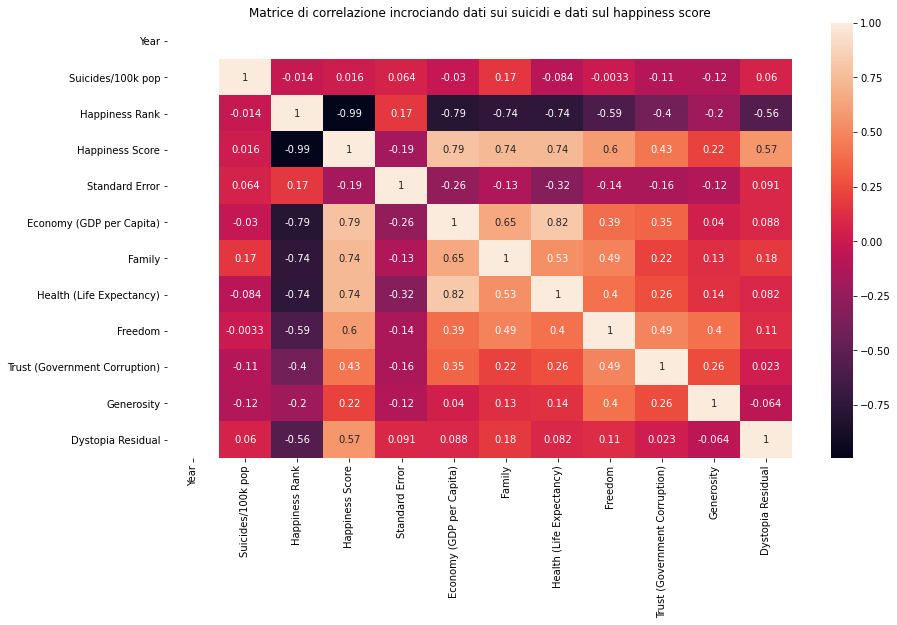

In [47]:
plt.figure(figsize=(14,8))
plt.title('Matrice di correlazione incrociando dati sui suicidi e dati sul happiness score')
# Mostro la correlazione lineare tra le feature del dataset
sns.heatmap(df_suicide_happiness_2015.corr(),annot=True)

The first row of the correlation matrix shows how the column *Suicides / 100k pop* relates to the other columns. It, with all the variables present representing the indicators of the *happiness score*, has no linear correlation, since its maximum correlation is with *Family* and is only 0.17, too little to succeed that is, the two variables are related.<br>

Since it was not possible to find any correlation between the data relating to the *happiness score*, we try to integrate further data into the analysis, such as data relating to unemployment and data relating to alcoholism.

### 2.2 Global unemployment data over time </a>

The previous *happiness score* dataset only dealt with the year 2015. Let's now also integrate the unemployment values ​​over time for each country.

**Source: *The World Bank*** - link: https://databank.worldbank.org/source/world-development-indicators

In [48]:
# Carico i dati usando il metodo read_csv. I valori nulli in questo dataset erano espressi con la stringa '..'
df_unemployment=pd.read_csv('unemployment_world_data.csv',na_values='..')

# Non considero i record in cui il paese è nullo, siccome non sarebbero informativi
df_unemployment=df_unemployment[df_unemployment['Country Name'].notnull()]

# Anche in questo caso, per permettere una successiva combinazione, cambio il nome da 'Russian Federation' in Russia e da 'Korea, Rep.' a 'Korea, South'
df_unemployment['Country Name']=df_unemployment['Country Name'].map({'Russian Federation':'Russia','Korea, Rep.':'Korea, South'}).fillna(df_unemployment['Country Name'])
# Visualizzazione d'esempio del dataset iniziale
df_unemployment.head(3)

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,11.488,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164
1,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,13.481,13.376,15.866,17.490,17.080,15.220,13.750,12.340,12.331,12.813
2,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,...,9.960,10.970,9.820,10.207,11.206,10.202,11.996,11.882,11.704,11.525


In this dataset each row contains a country with unemployment data over the years for those countries. We transform this data into *tidy data* using the *melt* method.

In [49]:
# Uso il metodo melt per cercare di trasformare in tidy data
df_unemployment=pd.melt(df_unemployment.iloc[:,2:],id_vars=['Country Name','Country Code'],var_name='Year',value_name='Unemployment')
df_unemployment.head()

,Country Name,Country Code,Year,Unemployment
0,Afghanistan,AFG,1960 [YR1960],NaN
1,Albania,ALB,1960 [YR1960],NaN
2,Algeria,DZA,1960 [YR1960],NaN
3,American Samoa,ASM,1960 [YR1960],NaN
4,Andorra,AND,1960 [YR1960],NaN


I check the structure of the *Year* column. I can see that all the records represent years which are in the format *yyyy [YRyyyy]*. So I use the *str [: 4]* method to get only the numeric year.

In [50]:
df_unemployment['Year'].unique()

array(['1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '

In [51]:
# Per ricavare solo l'anno, considero solamente le prime 4 cifre di ogni record della colonna 'Year'
df_unemployment['Year']=df_unemployment['Year'].str[:4]
df_unemployment.head()

,Country Name,Country Code,Year,Unemployment
0,Afghanistan,AFG,1960,NaN
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,NaN
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


##### Null values

In [52]:
print(f'Valori nulli nel dataset per ogni colonna:\n {df_unemployment.isnull().sum()}')

Valori nulli nel dataset per ogni colonna:
 Country Name       0
Country Code       0
Year               0
Unemployment    9114
dtype: int64


I can clearly see that the dataset, in the *Unemployment* column, has many null values, as also shown by the following graph obtained via the *missingno* library.

<AxesSubplot:>

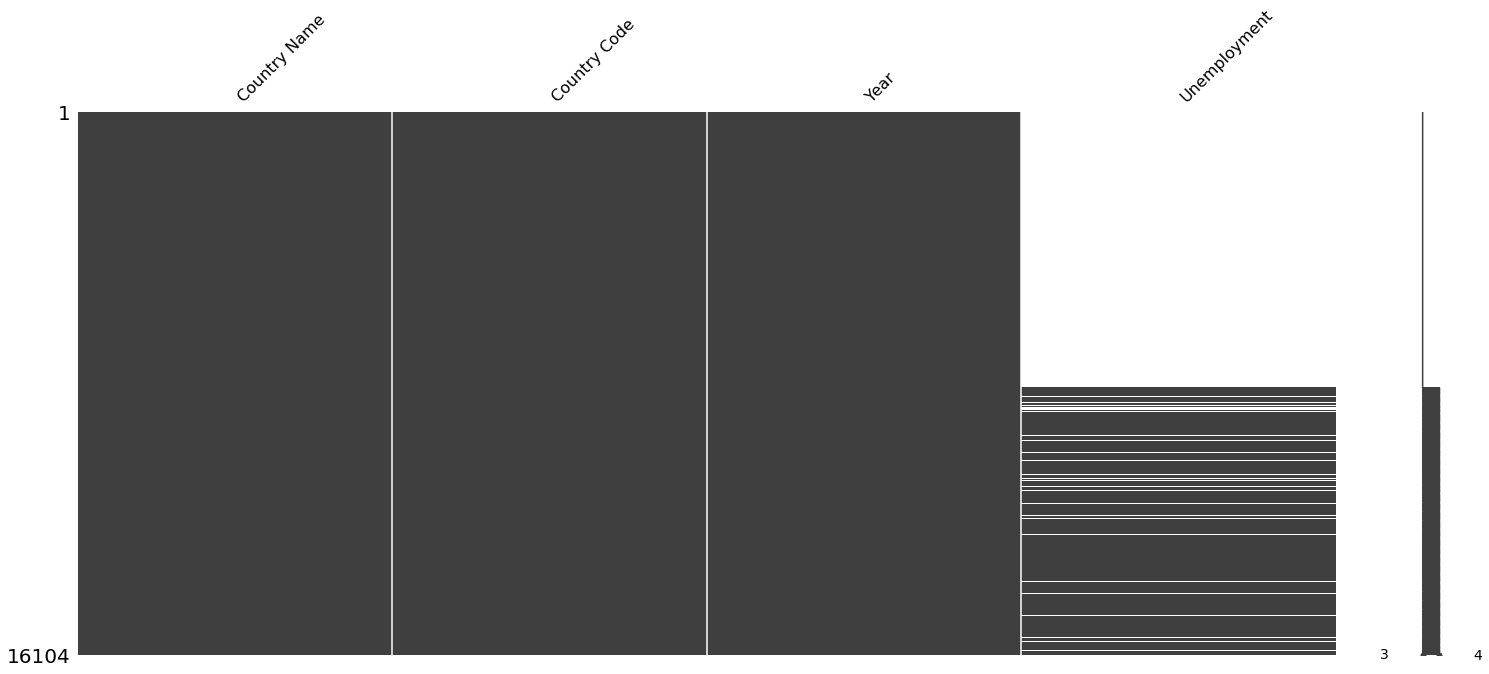

In [53]:
missingno.matrix(df_unemployment)

Since the dataset was sorted by the <*Year*,*Country Name*> pair, and as we can clearly see from the null matrix that the first half of the data for the *Year* column is missing, we can delete all records that are null.

In [54]:
# Elimino i valori nulli con dropna e resetto l'indice 
df_unemployment=df_unemployment.dropna().reset_index(drop=True)

In [55]:
# Trasformo il tipo di dato 'Year' in intero
df_unemployment['Year']=df_unemployment['Year'].astype(int)
# Rinomino la colonna 'Country Name' in 'Country' per mantenere lo standard
df_unemployment.rename(columns={'Country Name':'Country'},inplace=True)
df_unemployment.head()

,Country,Country Code,Year,Unemployment
0,Afghanistan,AFG,1991,11.218000
1,Albania,ALB,1991,16.190001
2,Algeria,DZA,1991,20.600000
3,Angola,AGO,1991,3.708000
4,Argentina,ARG,1991,5.440000


In [56]:
print(f"Dati disoccupazione da {df_unemployment['Year'].min()} al {df_unemployment['Year'].max()} ")

Dati disoccupazione da 1991 al 2020 


##### Correlations between suicides and unemployment

<AxesSubplot:title={'center':'Matrice correlazione tra suicidi e disoccupazione'}>

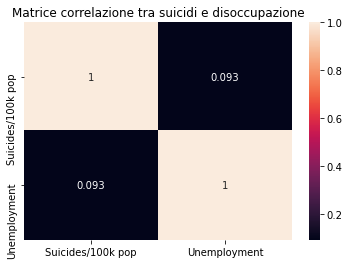

In [57]:
# Faccio la merge tra i dati sui suicidi e i dati sulla disoccupazione
df_suicide_and_unemployment=pd.merge(df_suicide_complete,df_unemployment,on=['Country','Year'])
# Plot della matrice di correlazione utilizzando la correlazione lineare
plt.title('Matrice correlazione tra suicidi e disoccupazione')
sns.heatmap(df_suicide_and_unemployment.iloc[:,1:].corr(),annot=True)

As can be seen from the correlation matrix, the data are not correlated as there is a correlation of 0.1.<br>
However, not all suicides for all age groups may be affected as heavily by unemployment (as for example the older population does not work). We then extract the 3 countries with the highest number of suicides from 25 to 54 years and we choose to consider only the male gender, as we have previously seen that female suicides remain mostly constant.

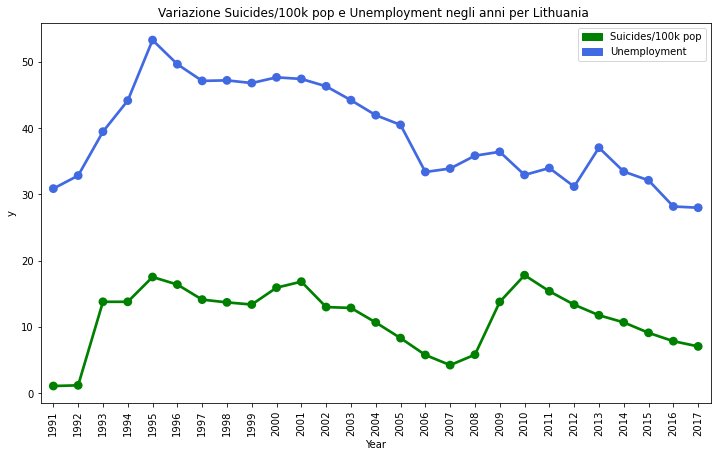

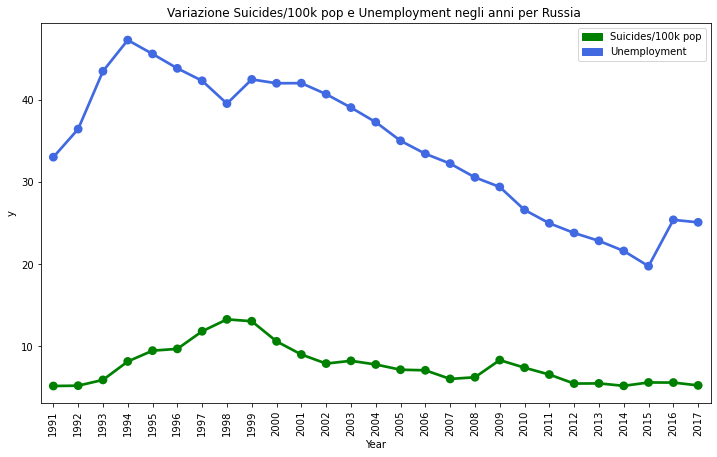

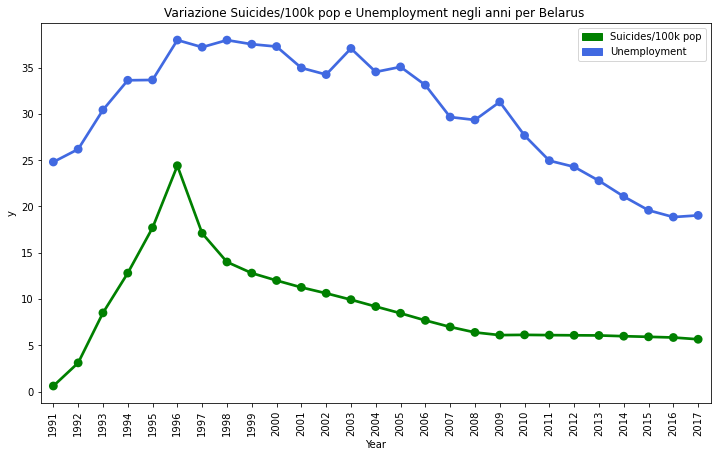

<AxesSubplot:title={'center':'Matrice di correllazione per i 3 paesi con più suicidi dai 25 ai 54 anni'}>

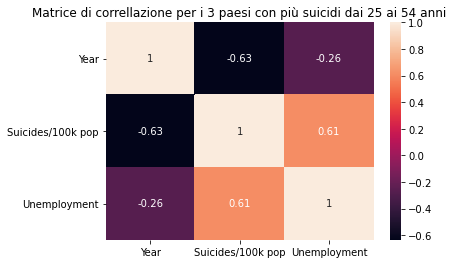

In [58]:
# Età da considerare nell'analisi
ages=['25-34 years','35-54 years']
# Estraggo i 3 paesi con piu suicidi dai 25 ai 54 anni e li metto in una lista
countries_with_most_suicide_from_25_to_54=df_suicide_who[(df_suicide_who['Age'].isin(ages))&(df_suicide_who['Sex']=='male')].groupby(['Country']).agg(np.mean).reset_index().sort_values(by='Suicides/100k pop',ascending=False)['Country'][:3].tolist()
# Per ognuno dei 3 paesi faccio un plot dove mostro andamento dei suicidi e della disoccupazione 
for c in countries_with_most_suicide_from_25_to_54:
    plt.figure(figsize=(12,7))
    plt.title(f'Variazione Suicides/100k pop e Unemployment negli anni per {c} ')
    df_support=df_suicide_and_unemployment[df_suicide_and_unemployment['Country']==c]
    sns.pointplot(x="Year", y="Suicides/100k pop",data=df_support,color='royalblue')
    sns.pointplot(x="Year", y="Unemployment",data=df_support,color='green')
    plt.xticks(rotation=90)
    green_patch = mpatches.Patch(color='green', label='Suicides/100k pop')
    blue_patch = mpatches.Patch(color='royalblue', label='Unemployment')
    plt.ylabel('y')
    plt.legend(handles=[green_patch,blue_patch])
    plt.show()

plt.title('Matrice di correllazione per i 3 paesi con più suicidi dai 25 ai 54 anni')
# Matrice di correlazione utilizzando solo i dati appartenenti ai 3 paesi con più suicidi dai 25 ai 54 anni
sns.heatmap(df_suicide_and_unemployment[df_suicide_and_unemployment['Country'].isin(countries_with_most_suicide_from_25_to_54)].corr(),annot=True)

As can be seen, unemployment seems to have a significant impact on the number of suicides for these three states. In fact, in all three states it can be seen that these two values ​​have quite similar trends over the years. <br>
This is confirmed by the linear correlation present between these two quantities which is 0.61, much higher than the one found before on all data which was 0.09.<br>
It can therefore be said that unemployment seems to be a factor that can lead to more suicides, especially considering the male population between 25 and 54 years old, however the phenomenon seems to be more complex, in fact this does not occur for all states.

### 2.3 Alcohol consumption data 2015</a>

The data on the average consumption of alcohol per person in 2015 in the various states will now be integrated, differentiating by sex.<br> Pay attention to the fact that this data does not represent the average number of alcoholics.

**Source: *The World Bank*** - link: https://databank.worldbank.org/source/world-development-indicators

In [59]:
# Lettura del dataset
df_alcholism=pd.read_csv('alcohol_consuption_2015.csv')
df_alcholism.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,0.21
1,Afghanistan,AFG,"Total alcohol consumption per capita, male (li...",SH.ALC.PCAP.MA.LI,0.35
2,Afghanistan,AFG,"Total alcohol consumption per capita, female (...",SH.ALC.PCAP.FE.LI,0.054
3,Albania,ALB,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,6.74
4,Albania,ALB,"Total alcohol consumption per capita, male (li...",SH.ALC.PCAP.MA.LI,10.92


In [60]:
# Funzione che in base al contenuto del record mi assegna il genere
def assign_sex(val):
    if val=='Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':
        return 'both sexes'
    elif val=='Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)':
        return 'male'
    elif val=='Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)':
        return 'female'
    else:
        return np.nan
    
# Applico la funzione assign_sex per assegnare un sesso a ogni record del dataset
df_alcholism['Sex']=df_alcholism['Series Name'].apply(assign_sex)
# Elimino la colonna 'Series Name' e 'Series Code'
df_alcholism.drop(columns=['Series Name','Series Code'],inplace=True)
# Rinomino le colonne
df_alcholism.rename(columns={'Country Name':'Country','2015 [YR2015]':'Alcohol per Capita'},inplace=True)
df_alcholism.loc[df_alcholism['Alcohol per Capita']=='..','Alcohol per Capita']=np.nan
# Elimino i valori nulli nel dataset
df_alcholism.dropna(inplace=True)
# Converto la colonna 'Alcohol per Capita' in float
df_alcholism['Alcohol per Capita']=df_alcholism['Alcohol per Capita'].astype(float)
#Anche in questo caso, per permettere una successiva combinazione, cambio il nome da 'Russian Federation' in Russia e da 'Korea, Rep.' a 'Korea, South'
df_alcholism['Country']=df_alcholism['Country'].map({'Russian Federation':'Russia','Korea, Rep.':'Korea, South'}).fillna(df_alcholism['Country'])

df_alcholism.head()

,Country,Country Code,Alcohol per Capita,Sex
0,Afghanistan,AFG,0.210,both sexes
1,Afghanistan,AFG,0.350,male
2,Afghanistan,AFG,0.054,female
3,Albania,ALB,6.740,both sexes
4,Albania,ALB,10.920,male


##### Exploratory analysis

<AxesSubplot:title={'center':'Distribuzione alcohol per capita in base al genere'}, xlabel='Sex', ylabel='Alcohol per Capita'>

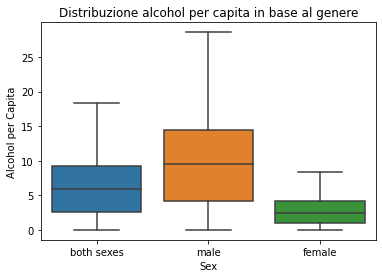

In [61]:
plt.title('Distribuzione alcohol per capita in base al genere')
sns.boxplot(y='Alcohol per Capita',x='Sex',data=df_alcholism)

Even in this case, it is clear that the male population drinks much more alcohol on average than the female population.

##### Correlazione dei suicidi con consumo di alcolici 

<AxesSubplot:title={'center':'Matrice correlazione tra numero di suicidi e consumo di alcolici'}>

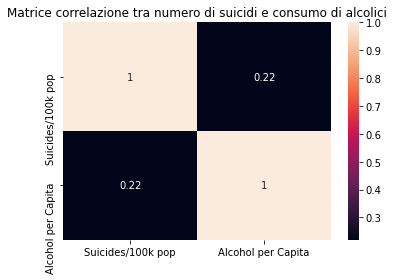

In [62]:
plt.title('Matrice correlazione tra numero di suicidi e consumo di alcolici')
# Matrice di correlazione (lineare) tra suicidi e consumo di alcol per Capita
sns.heatmap(pd.merge(df_suicide_complete[df_suicide_complete['Year']==2015],df_alcholism,on='Country').iloc[1:,1:].corr(),annot=True)

There does not seem to be an obvious linear correlation between the two quantities.

As done before, let's try to see if considering only the male population, we can get a higher correlation. We use the suicide data of the *WHO*, as only in this dataset are the data divided by sex.

<AxesSubplot:title={'center':'Relazione tra suicidi e consumo di alcoli per la popolazione maschile nel 2015'}, xlabel='Alcohol per Capita', ylabel='Suicides/100k pop'>

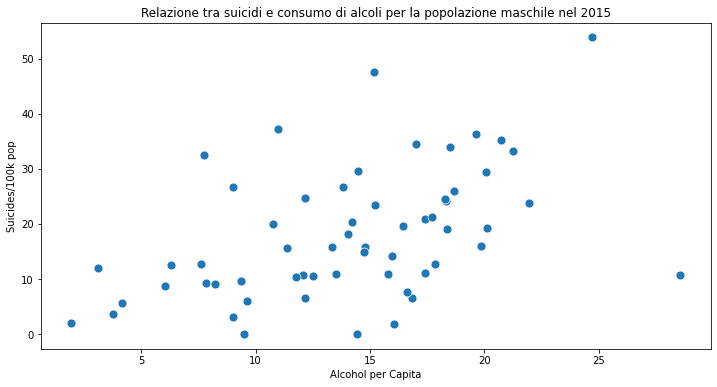

In [63]:
df_suicide_male_2015=(df_suicide_who[(df_suicide_who['Sex']=='male')&(df_suicide_who['Year']==2015)]).groupby('Country').agg(np.mean).reset_index()
df_alcholism_male=df_alcholism[df_alcholism['Sex']=='male']
df_suicide_alcholism_2015=pd.merge(df_suicide_male_2015,df_alcholism_male,on='Country')
plt.figure(figsize=(12,6))
plt.title('Relazione tra suicidi e consumo di alcoli per la popolazione maschile nel 2015')
sns.scatterplot(data=df_suicide_alcholism_2015,x='Alcohol per Capita',y='Suicides/100k pop',s=80)

In the graph you can see a bit of a linear pattern. All countries with low alcohol consumption have very low suicide rates, and the trend of increasing alcohol consumption remains similar. However, there is an anomalous case, namely the country that consumes the most alcohol (*Seychelles*) has few suicides.

<AxesSubplot:title={'center':'Matrice di correlazione tra consumo di alcolici e popolazione maschile nel 2015'}>

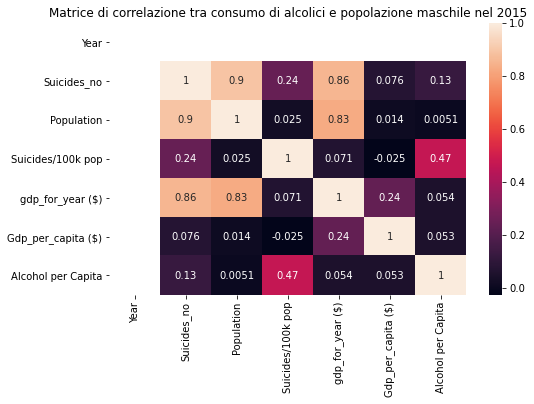

In [64]:
plt.figure(figsize=(8,5))
plt.title('Matrice di correlazione tra consumo di alcolici e popolazione maschile nel 2015')
sns.heatmap(df_suicide_alcholism_2015.corr(),annot=True)

The correlation between the number of suicides and alcohol consumption for the male population is only 0.47, not enough to say that there is a close correlation, however there is a pattern between these two quantities. Interestingly, all countries with low alcohol consumption all have few suicides.

## 3. Conclusions </a>

We then analyzed all these data relating to suicides, starting from the dataset provided by the *WHO* and integrating it with other data. After doing an exploratory analysis of suicides, it emerged that the number of suicides per 100,000 people from 1990 to the present has decreased slightly. <br>
Analyzing these data by aggregating them by sex, it is noted that males have a much higher number of suicides than women. The reason is not clear but it could be related to the social pressure they have in society.<br>
On the other hand, analyzing the data by age group, it has been seen that with increasing age more suicides are committed, in fact the population over 75 years old is the one with the most suicides. The country with the most suicides is largely *Greenland*, followed at a distance by *Lithuania* and other countries such as *Russia* and *Hungary*.
Using a clustering algorithm it was found that there were countries with similar patterns. For example, it was noted that *South Korea* from 1990 to today has greatly increased the suicide rate and doing an in-depth analysis it has been seen that this mainly concerned the elderly population and that it was probably also due to the Asian economic crisis of 1997. <br>
We then went on to look if we could find correlations between the data relating to *happiness score*, *unemployment* and *alcohol consumption*, and while the 'happiness score is not correlated with the number of suicides, unemployment is quite correlated with the suicides of the male population aged 25 to 54, while alcohol consumption has a medium-low correlation with the number of suicides in the male population .
We can sum it up by saying that it is difficult to find a main reason for suicides, considering all countries. There is probably a number of factors, such as the culture of the country.